## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## 1. Introduction

Column descriptions for King County Data Set

*   id - unique identified for a house
*   dateDate - house was sold
*   pricePrice - is prediction target
*   bedroomsNumber - of Bedrooms/House
*   bathroomsNumber - of bathrooms/bedrooms
*   sqft_livingsquare - footage of the home
*   sqft_lotsquare - footage of the lot
*   floorsTotal - floors (levels) in house
*   waterfront - House which has a view to a waterfront
*   view - Has been viewed
*   condition - How good the condition is ( Overall )
*   grade - overall grade given to the housing unit, based on King County
*   grading system
*   sqft_above - square footage of house apart from basement
*   sqft_basement - square footage of the basement
*   yr_renovated - Year when house was renovated
*   zipcode - zip
*   yr_built - Built Year
*   lat - Latitude coordinate
*   long - Longitude coordinate
*   sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
*   sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors



**Business problem:**

The real estate agency aims to provide valuable advice to homeowners on how specific home features will impact the estimated value of their homes. The primary objective is to help homeowners make informed decisions about which features could potentially yield the highest return on investment in terms of increased property value.

**Data:**

We have been provided with The King County House Sales dataset which contains property sales between year 2014 - 2015 and 21,420 records of houses sold. Each record in the data set gives features such as number of bedrooms, the size of various rooms in square feet, about the individual homes.

   ## Objectives
   1. Develop a model that will assist home buyers and home sellers identify attributes that influence the prices of houses.
   
   2. Develop regression models that will guide the real eatate agencies on pricing.

   3. Determine features that have the biggest impact on the sale price of a house and by how much.
   

## 2. Data Understanding

In [106]:
#Loading libraries
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error

In [107]:
# load data, count number of unique entries and scope in terms of timeline
df = pd.read_csv('kc_house_data.csv')

# convert 'date' column to date format
df['date'] = pd.to_datetime(df['date'])

# Create a new column for the year
df['year'] = df['date'].dt.year

# Display the range of years
min_year = df['year'].min()
max_year = df['year'].max()

unique_id_count = df['id'].nunique()

print(f"The number of sales in the data set is: {unique_id_count}")
print(f"The range of years in the data is from {min_year} to {max_year}")

df.head()

The number of sales in the data set is: 21420
The range of years in the data is from 2014 to 2015


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,2015


In [108]:
#Convert the 'sqft_basement' column to a numeric format and replaces any non-numeric values with NaN and, cast it to the float data type.
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [109]:
# Extract information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21143 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

We can see that we have a total of 22 columns and 21597 rows as shown below.

In [110]:
print("The number of rows is :", df.shape[0])
print("The number of columns is :", df.shape[1])

The number of rows is : 21597
The number of columns is : 22


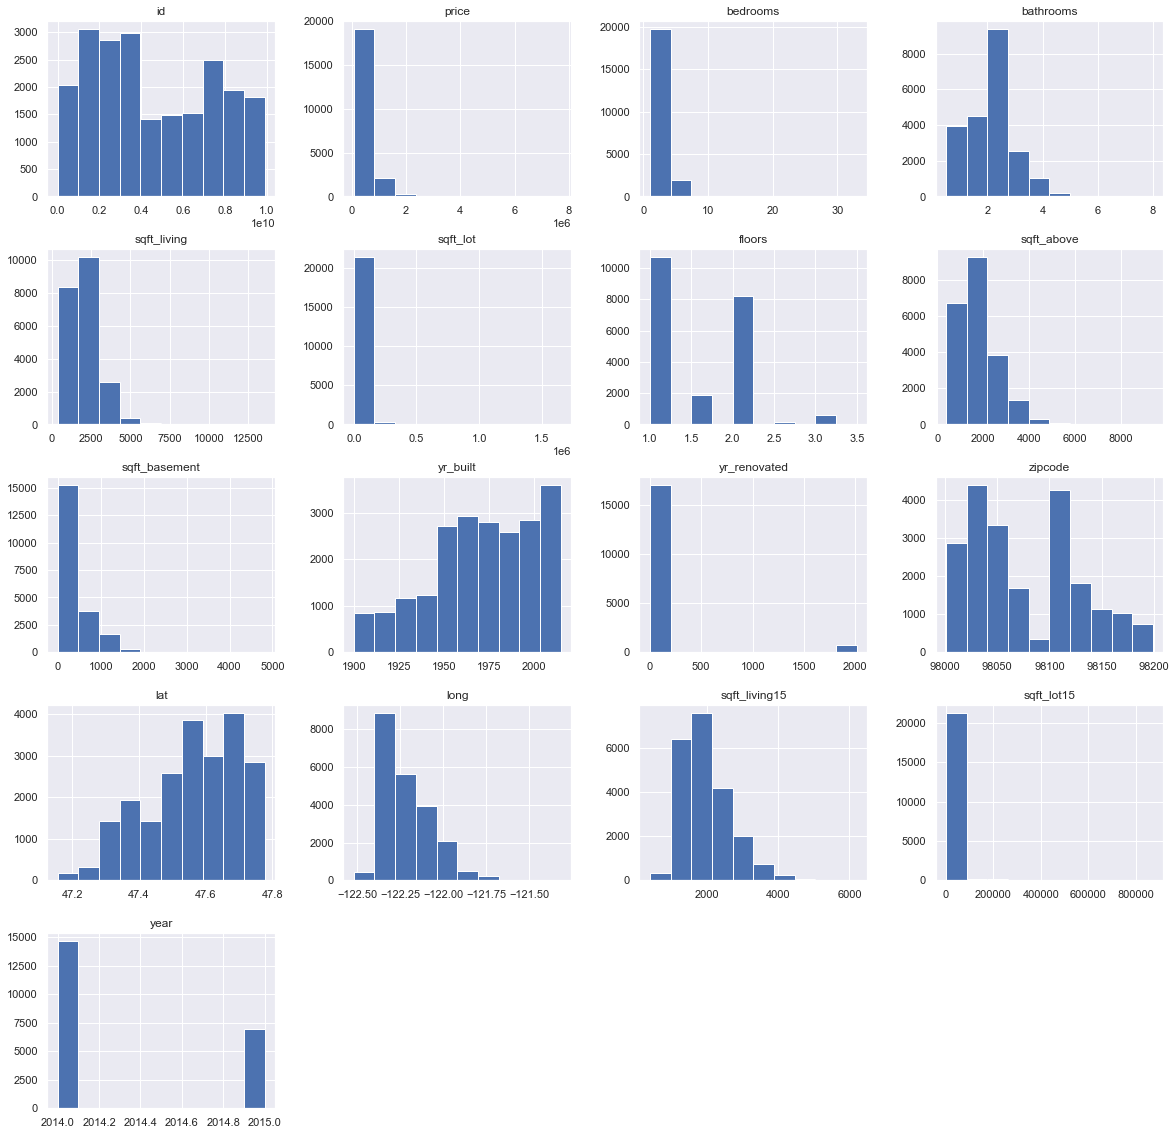

In [111]:
#Create histograms to show the distribution of all columns
df.hist(figsize=(20,20));

We can see that most variables don't follow a normal distribution. This may create some issues with some regression assumptions.

In [112]:
# Get statistical description
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21143.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,291.851724,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,2014.322962
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,442.498337,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950,0.467619
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,2014.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,2014.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


## 3. Data Preparation

Here we will check for duplicates and eliminate them if any, check for missing or null values, outliers and decide on the most appropriate method of handling them and also look at the data types and format them to the most appropriate data type that is suitable for our analysis.

### Handling Missing Values

In [113]:
# First, we check for duplicates
df.duplicated().sum()

0

Now that we have confirmed there are no duplicates in our data, we create a function that calculates the percentage of of null values. This will come in handy when making decisions on handling the null values.

In [114]:
# Computing the percentage of the missing data
from pandas.core.dtypes import missing
def missingdataanalysis(data):
    count_nulls = data.isna().sum()
    nulls_percentage = (data.isna().sum()) / (len(data))
    column_names = pd.DataFrame({'Missing Values':count_nulls, 'Percentage':nulls_percentage})
    return column_names

In [115]:
missingdataanalysis(df)

,Missing Values,Percentage
id,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000
floors,0,0.000000
waterfront,2376,0.110015
view,63,0.002917


We can see that the columns waterfront, view, sqft_basement and yr_renovated have missing values. Let's tackle them.

In [116]:
# Checking the unique values in waterfront
df["waterfront"].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [117]:
# Filling the missing values in waterfront using the mode method
mode_value = df['waterfront'].mode().iloc[0]
df['waterfront'].fillna(mode_value, inplace=True)

In [118]:
df["view"].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [119]:
# Replacing the missing values with NONE
df["view"].replace({np.nan:"NONE"},inplace=True)

In [120]:
df["yr_renovated"].value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [121]:
df["yr_renovated"].replace({np.nan:0.0},inplace=True)

In [122]:
# confirming if missing values have been handled
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement    454
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
year               0
dtype: int64

In [123]:
# Feature engineering of a new column called Age_sold containing the age of each property at the time it was sold.
df["Age_sold"] = df['date'].dt.year-df["yr_built"]

In [124]:
columns_to_drop=["id","date","yr_renovated","yr_built","sqft_basement"]
df.drop(columns=columns_to_drop,inplace=True)

In [125]:
# Check added column "Age_sold" and dropping of column "date","yr_built"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  object 
 7   view           21597 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  zipcode        21597 non-null  int64  
 12  lat            21597 non-null  float64
 13  long           21597 non-null  float64
 14  sqft_living15  21597 non-null  int64  
 15  sqft_lot15     21597 non-null  int64  
 16  year           21597 non-null  int64  
 17  Age_sold       21597 non-null  int64  
dtypes: flo

### Handling Categorical Data

#### One-Hot Encoding and Label Encoding

Here we change categorical data to numerical data. We will use Label Encoding where there is an ordinal relationship and
One-Hot Encoding when there is no ordinal relationship.

We have 3 categorical data i.e waterfront, condition and grade.

In [126]:
# Hot encoding the waterfront column
df["waterfront"].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

Here, we can replace the "NO" and "YES" with 0 and 1 since they have a binary relationship.

In [127]:
df["waterfront"] = df["waterfront"].replace({"YES":1,"NO":0})

In [128]:
# Hot encoding the condition column
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

Open the "column.names.md" file and follow the link (https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) under the condition column to understand the scale of each condition.

BUILDING CONDITION Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.

In [129]:
# Replacing the categorical values in 'condition' to numeric values
df["condition"] = df["condition"].replace({"Poor":1,"Fair":2,"Average":3,"Good":4,"Very Good":5})

In [130]:
df["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

Building Grade.

This represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [131]:
# Define the mapping of categorical values to numeric values
grade_mapping = {
    "3 Poor": 3,
    "4 Low": 4,
    "5 Fair": 5,
    "6 Low Average": 6,
    "7 Average": 7,
    "8 Good": 8,
    "9 Better": 9,
    "10 Very Good": 10,
    "11 Excellent": 11,
    "12 Luxury": 12,
    "13 Mansion": 13
}

# Replace the values in the 'grade' column with numeric values
df['grade'] = df['grade'].replace(grade_mapping)

In [132]:
# Convert the data type of the 'grade' column to integers
df['grade'] = df['grade'].astype(int)

We, however, still have to deal with the categorical variables, otherwise when we try to build our models, it will inteprete the information provided incorrectly "view","condtion","grade"

In [133]:
df["view"] = df["view"].replace({"NONE":0,"AVERAGE":1, "GOOD":2 ,"FAIR":3 ,"EXCELLENT":4})

df["view"].value_counts()

0    19485
1      957
2      508
3      330
4      317
Name: view, dtype: int64

In [134]:
# Let us observe our changes so far.
df.sample(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,zipcode,lat,long,sqft_living15,sqft_lot15,year,Age_sold
12241,465000.0,3,2.25,1920,7300,1.0,0,0,3,7,1240,98008,47.6078,-122.128,1920,7700,2014,53
10189,605000.0,3,2.25,2010,10760,2.0,0,0,3,8,2010,98052,47.7276,-122.103,2240,9357,2014,29
9770,450000.0,3,1.00,1450,3350,1.5,0,0,4,7,1450,98126,47.5607,-122.378,1340,4255,2014,95
7523,935000.0,4,2.00,1220,7489,2.0,0,0,3,7,1220,98122,47.6133,-122.306,1220,3750,2015,112
10999,850000.0,3,2.50,2940,10809,2.0,0,0,3,10,2940,98006,47.5418,-122.136,3090,10348,2015,23
7598,518000.0,4,3.00,2430,11670,1.0,0,0,4,7,1330,98034,47.7307,-122.228,1580,10464,2015,37
6913,435000.0,3,2.50,1470,3000,1.0,0,0,3,7,930,98115,47.6832,-122.286,1470,5588,2014,29
471,868700.0,3,4.25,3840,6161,2.0,0,0,3,10,3840,98074,47.6336,-122.064,3230,7709,2015,15
5099,569950.0,5,2.75,2510,28185,1.0,0,0,4,7,1600,98155,47.7719,-122.282,2910,14880,2014,51
525,727500.0,2,2.00,1240,9119,1.0,0,0,4,7,1240,98004,47.6221,-122.193,1380,9121,2014,62


## 4. Exploratory Data Analysis


Here we seek to understand our independent variables against the dependent variable.

In [135]:
# Assignining variables to the columns
price = df['price']
bathrooms = df['bathrooms']
bedrooms = df['bedrooms']
grade = df['grade']
floors = df['floors']
sqft_living = df['sqft_living']
condition = df['condition']
waterfront = df['waterfront']
view = df['view']
sqft_living15= df['sqft_living15']


<ipython-input-136-fdc8d560c09e>:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  f.tight_layout()
findfont: Font family ['Silom'] not found. Falling back to DejaVu Sans.


<Figure size 720x288 with 0 Axes>

findfont: Font family ['Silom'] not found. Falling back to DejaVu Sans.


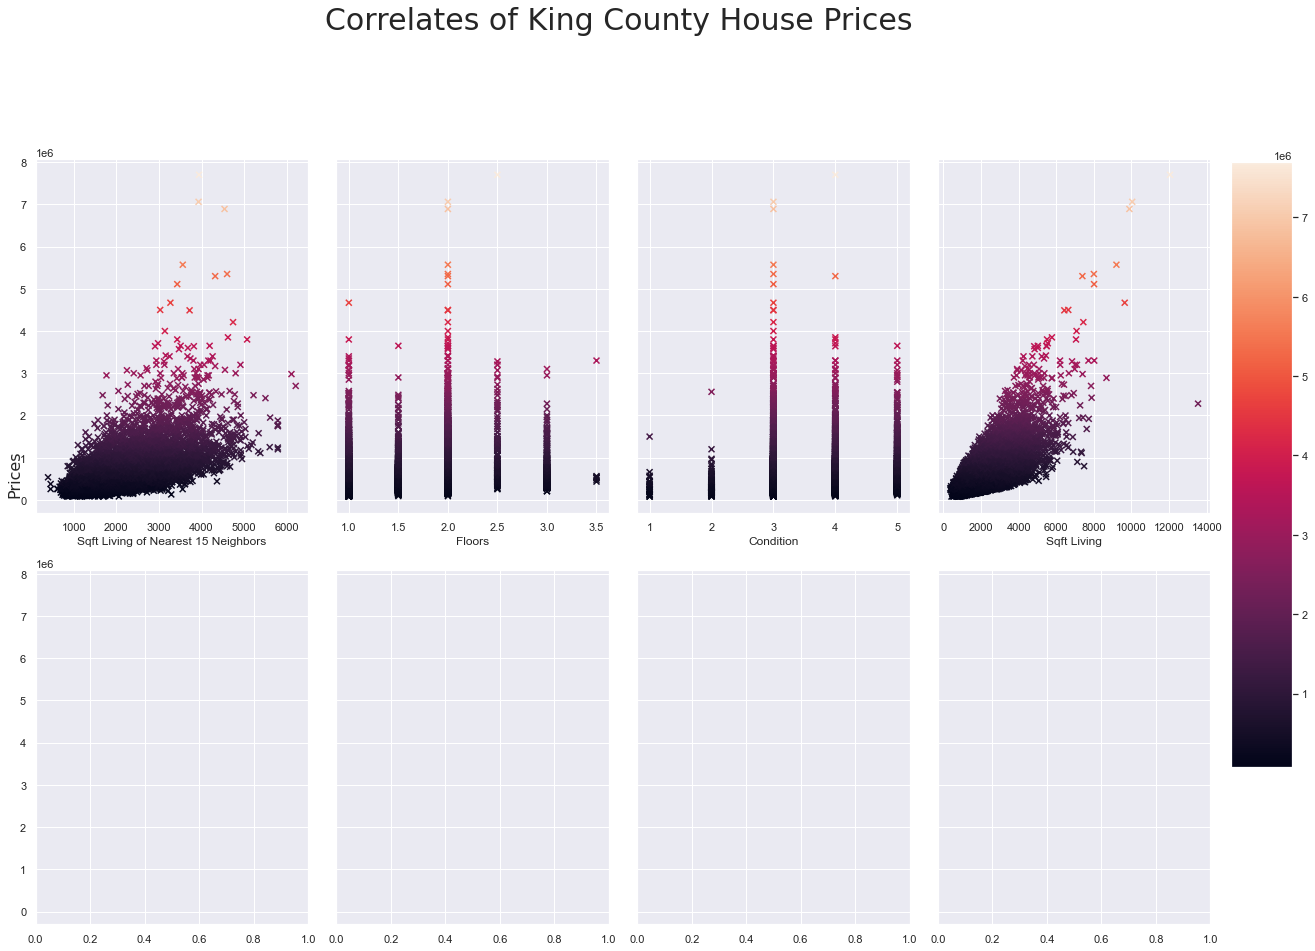

In [136]:
f = plt.figure()
f, axes = plt.subplots(nrows = 2, ncols = 4, sharex=False, sharey = True, figsize=(17,12))

f.suptitle('Correlates of King County House Prices', fontsize=30, y=1.1, fontname='Silom')
f.text(0.0001, 0.56, 'Prices', va='center', rotation='vertical', fontsize=16, fontname='Silom')

axes[0][0].scatter(sqft_living15, price, c = price, marker = "x")
axes[0][0].set_xlabel('Sqft Living of Nearest 15 Neighbors')

axes[0][1].scatter(floors, price, c = price, marker = "x")
axes[0][1].set_xlabel('Floors')

axes[0][2].scatter(condition, price, c = price, marker = "x")
axes[0][2].set_xlabel('Condition')

sc = axes[0][3].scatter(sqft_living, price, c = price, marker = "x")
axes[0][3].set_xlabel('Sqft Living')

cbar_ax = f.add_axes([1, 0.22, 0.05, 0.7])

f.colorbar(sc, cax=cbar_ax)

f.tight_layout()
plt.show()

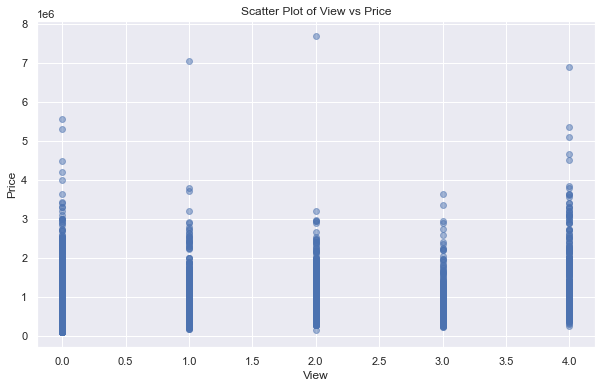

In [137]:
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df['view'], df['price'], alpha=0.5)
plt.title('Scatter Plot of View vs Price')
plt.xlabel('View')
plt.ylabel('Price')
plt.grid(True)
plt.show()

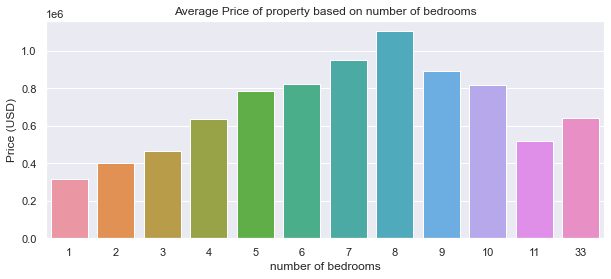

In [138]:
# grouping bedrooms
x = df.groupby(['bedrooms'])[['price']].mean()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x,
           x=x.index,
           y='price').set(title='Average Price of property based on number of bedrooms',
                                  xlabel='number of bedrooms', ylabel='Price (USD)');

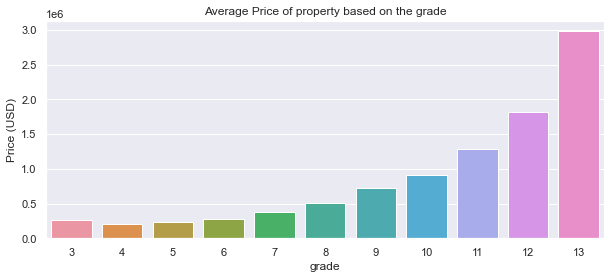

In [139]:
# grouping floors
x = df.groupby(['grade'])[['price']].median()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x,
           x=x.index,
           y='price').set(title='Average Price of property based on the grade',
                                  xlabel='grade', ylabel='Price (USD)');

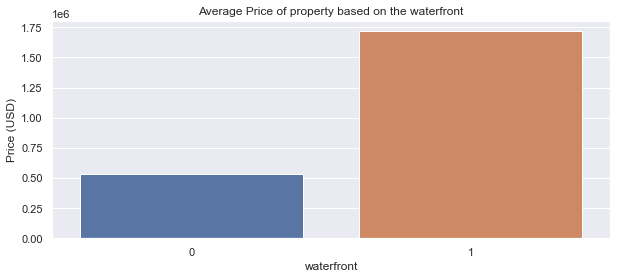

In [140]:
# grouping waterfront
x = df.groupby(['waterfront'])[['price']].mean()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x,
           x=x.index,
           y='price').set(title='Average Price of property based on the waterfront',
                                  xlabel='waterfront', ylabel='Price (USD)');

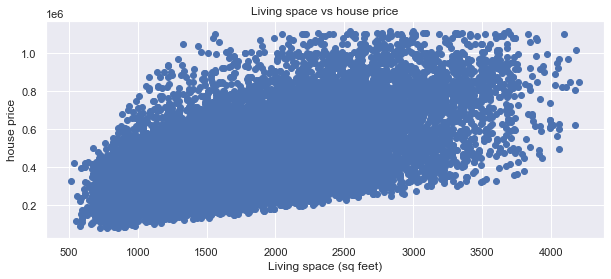

In [141]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x = 'sqft_living', y='price', data=data)
ax.set_xlabel('Living space (sq feet)')
ax.set_ylabel('house price')
ax.set_title('Living space vs house price');

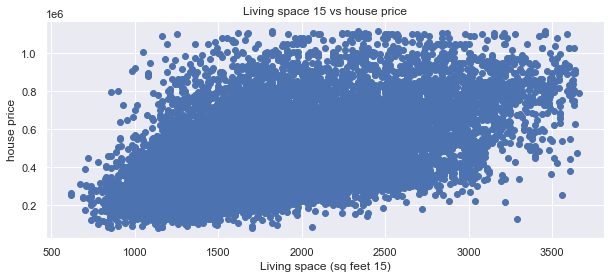

In [142]:
fig, ax = plt.subplots(figsize=(10, 4))
ax.scatter(x = 'sqft_living15', y='price', data=data)
ax.set_xlabel('Living space (sq feet 15)')
ax.set_ylabel('house price')
ax.set_title('Living space 15 vs house price');

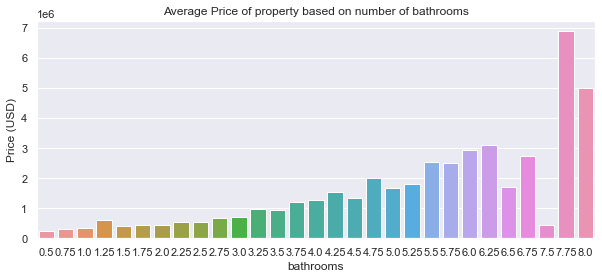

In [143]:
# grouping bathrooms
x = df.groupby(['bathrooms'])[['price']].mean()

# plot the output
sns.set(rc={'figure.figsize':(10,4)})
sns.barplot(data=x,
           x=x.index,
           y='price').set(title='Average Price of property based on number of bathrooms',
                                  xlabel='bathrooms', ylabel='Price (USD)');

## Handling Outliers

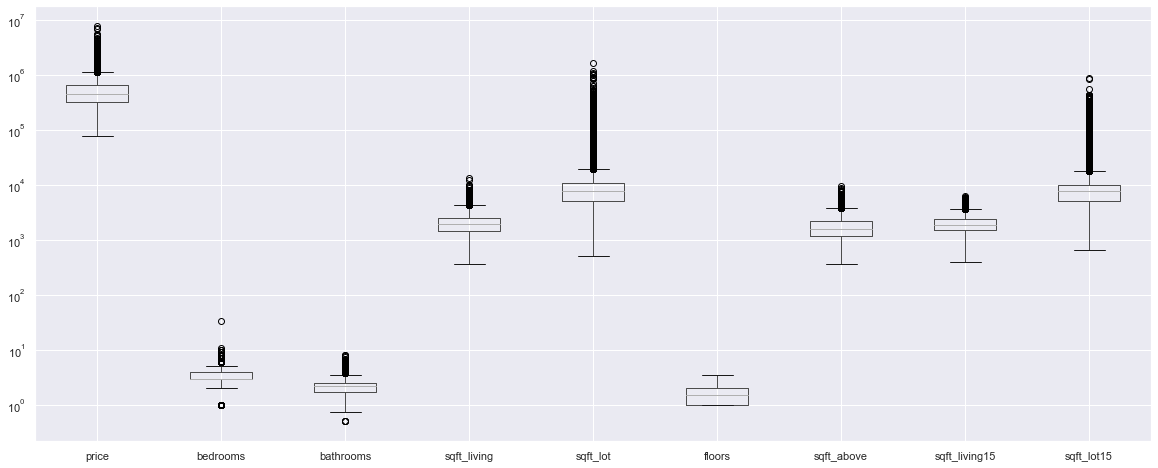

In [144]:
# visualize data to assess outliers
columns=['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','sqft_above', 'sqft_living15', 'sqft_lot15',]
df[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

In [145]:
# Define the columns to check for outliers
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors','sqft_above', 'sqft_living15', 'sqft_lot15']

print("Summary statistics before removing outliers:")
print(df[columns].describe())
# Calculate the IQR for each column
Q1 = df[columns].quantile(0.25)
Q3 = df[columns].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers from each column
data = df[~((df[columns] < (Q1 - 1.5 * IQR)) | (df[columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

print("\nSummary statistics after removing outliers:")
print(data[columns].describe())

Summary statistics before removing outliers:
              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  2.159700e+04   
mean   5.402966e+05      3.373200      2.115826   2080.321850  1.509941e+04   
std    3.673681e+05      0.926299      0.768984    918.106125  4.141264e+04   
min    7.800000e+04      1.000000      0.500000    370.000000  5.200000e+02   
25%    3.220000e+05      3.000000      1.750000   1430.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068500e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    sqft_above  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000   21597.000000   21597.000000  
mean       1.494096   1788.596842    1986.620318   12758.283512  
std        0.539683    827.759761     685.230

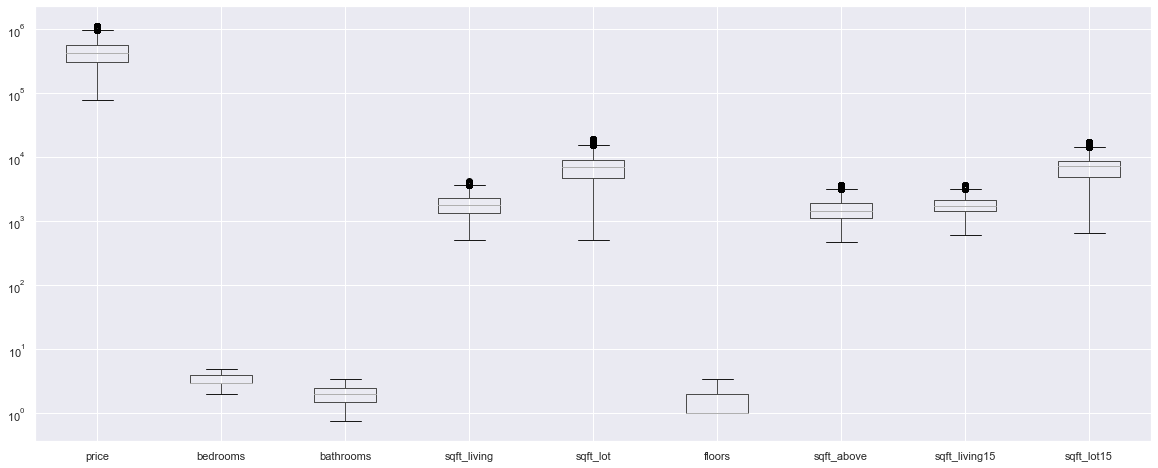

In [146]:
# Box plots after removing outliers
data[columns].boxplot(figsize = (20,8))
plt.yscale('log')
plt.show()

In [147]:
# Let us investigate the columns and find information which will help us identify which features have a significant correlation with the 'price' column.
col = [] # List to store column names with significant correlations
correlations = [] # List to store corresponding correlation values
for index, correlation in corr_matrix['price'].T.items():
    if correlation >= .30 and index != 'price':
        col.append(index)
        correlations.append(correlation)
corr_df = pd.DataFrame({'Correlations':correlations, 'Features': col}).sort_values(by=['Correlations'], ascending = False)

NameError: name 'corr_matrix' is not defined

In [ ]:
 # Let us find out about pairs of features that exhibit multicollinearity, along with their correlation values.
# This information is helpful in identifying and addressing multicollinearity issues

Multicollinear_Features = [] # List to store pairs of multicollinear features
Multicollinear_Corr = [] # List to store corresponding correlation values
def multicollinearity_test(feature):
    for index, correlation in corr_matrix[feature].T.items():
        if correlation >= .75 and index != feature:
            Multicollinear_Features.append([feature, index])
            Multicollinear_Corr.append(correlation)

for feature in corr_matrix:
    multicollinearity_test(feature)
Multicollenear_df = pd.DataFrame({'Correlations':Multicollinear_Corr, 'Features': Multicollinear_Features}).sort_values(by=['Correlations'])

In [ ]:
price_corr = corr_matrix['price'].sort_values(ascending=False)
price_corr

price            1.000000
grade            0.577646
sqft_living      0.559520
sqft_living15    0.493803
lat              0.466701
sqft_above       0.446712
bathrooms        0.383947
bedrooms         0.256461
floors           0.249435
sqft_basement    0.227447
view             0.219408
condition        0.057676
waterfront       0.050035
long             0.006876
sqft_lot        -0.049100
sqft_lot15      -0.056387
Name: price, dtype: float64

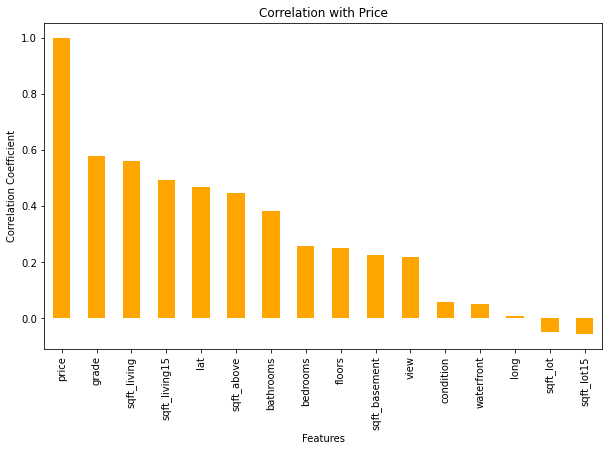

In [ ]:
# This will show a bar chart where each bar represents the correlation coefficient between the 'price' column and another feature,
# with features sorted in descending order of correlation strength.
plt.figure(figsize=(10, 6))
price_corr.plot(kind='bar', color=['orange'])
plt.title('Correlation with Price')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


We will drop columns that have a high multicolleneality(sqft_lot,sqft_lot15,sqft_above).
Although sqft_living and sqft_above are both highly correlated with price, only one of them can be included in a multiple regression model because they are also highly correlated with each other. Fortunately, the other two variables whose correlation violates this assumption have a relatively weak correlation with price.

In [ ]:
df.drop(['sqft_lot','sqft_lot15','sqft_above', 'id', 'date'], axis=1, inplace=True)

## 5. Modeling

### Baseline Model
We will build our baseline model using sqft_living because it has the strongest correlation with Price.

In [148]:
# Defining a function for our linear regression model
def model_Plots(model, x, x_name, y):

    residuals = model.resid

    f, axes = plt.subplots(nrows = 1, ncols = 2, sharex=False, sharey = False, figsize=(35,12), squeeze=False)

    f.text(s="Residuals Summary", x=.42, y=1.15, fontsize=55)
    f.text(s="r-Squared: {r}".format(r=round(model.rsquared, 2)), x=.40, y=1.05, fontsize=35)
    f.text(s="p-value: {p}".format(p= model.f_pvalue), x=.53, y=1.05, fontsize=35)

    f.text(s='Residuals Histogram', x=.65, y=.95, fontsize=45)

    sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True, ax=axes[0][0])

    f.text(s='QQ Plot', x=.25, y=.95, fontsize=45)

    axes[0][1].hist(residuals)
    plt.show;


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:28:50   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

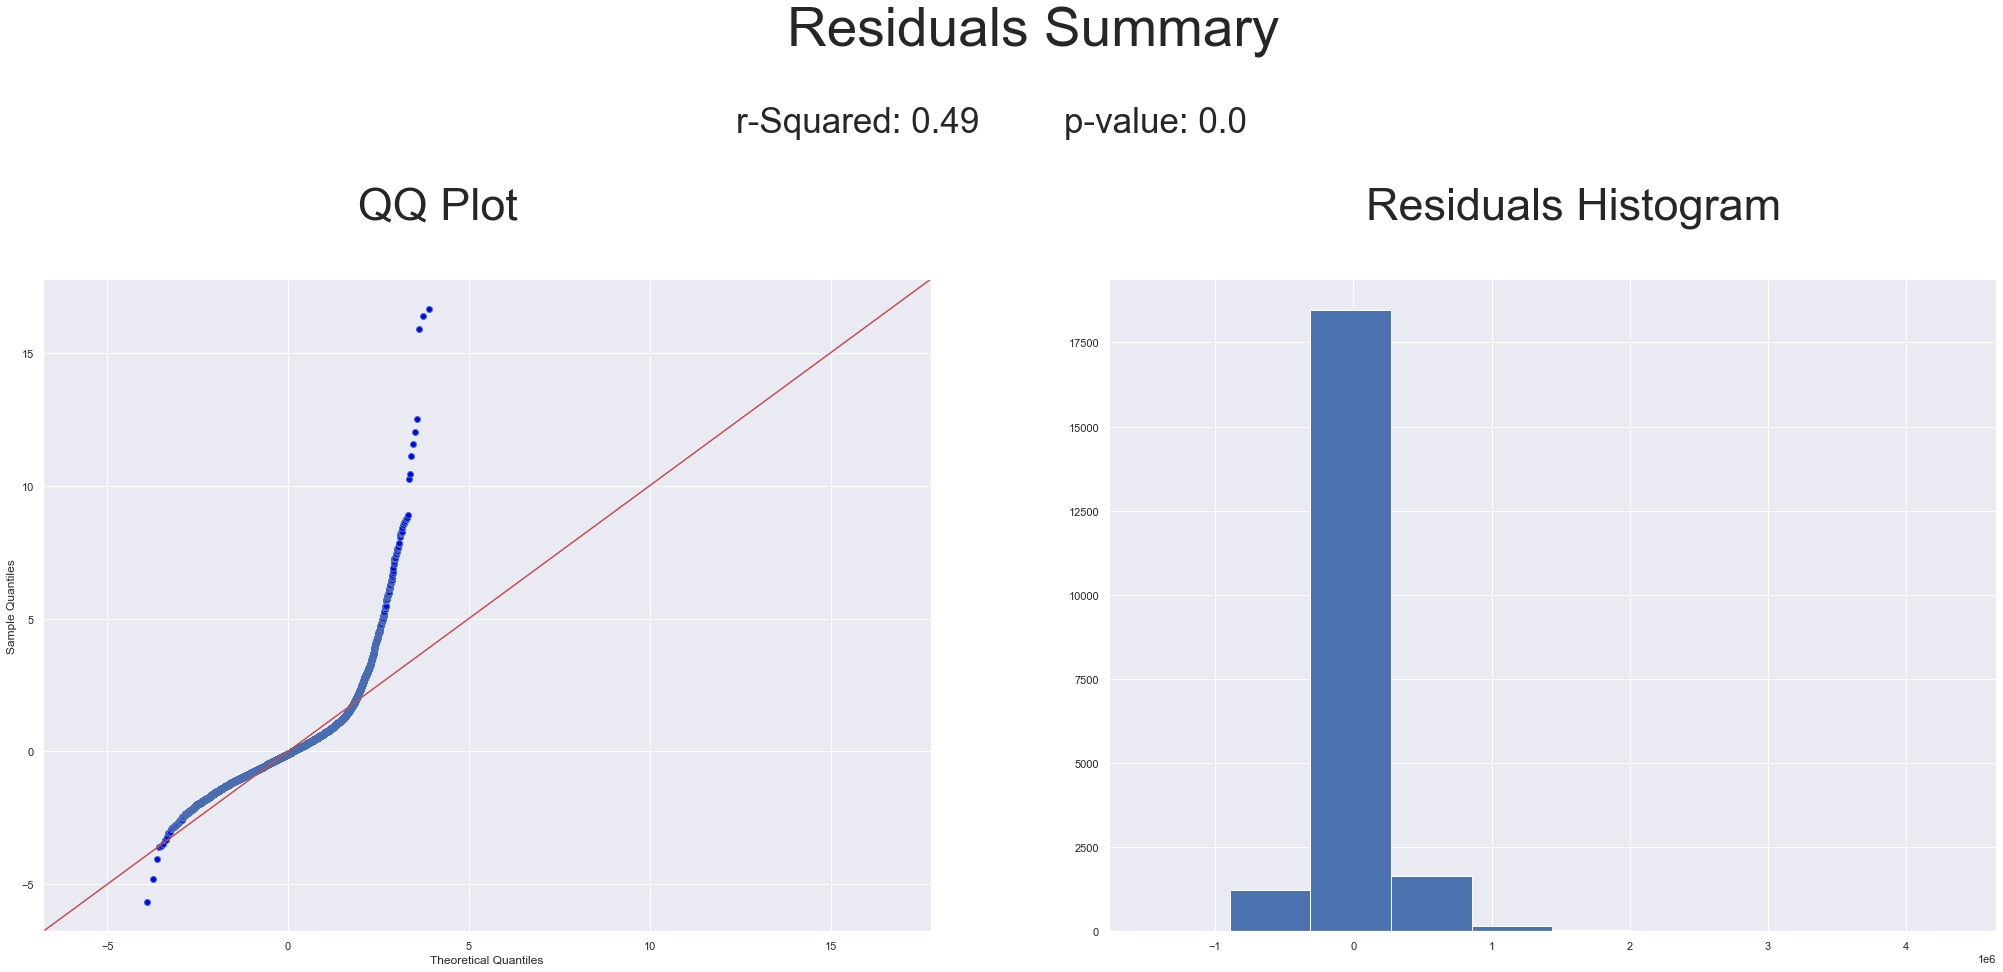

In [149]:
#baseline model based on sqft_living
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

X = df['sqft_living']

# Add a constant to the predictor variable for the intercept
X = sm.add_constant(X)

# y represents the target variable
y = df['price']

# Create and fit the OLS (Ordinary Least Squares) model
model1a = sm.OLS(y, X).fit()

# Display the summary of the model

print(model1a.summary())

# RMSE
rmse = np.sqrt(model1a.mse_resid)


print("THE RMSE: ", rmse)

model_Plots(model1a, sqft_living,'sqft_living',price)
print(model1a.summary())

The model violates the normality assumptions of linear regression and homoscedasticity.
To address these issues, we need to perform log transformations on the dependent variable sqft_living and price.

Text(0.5, 1.0, 'distribution of residuals')

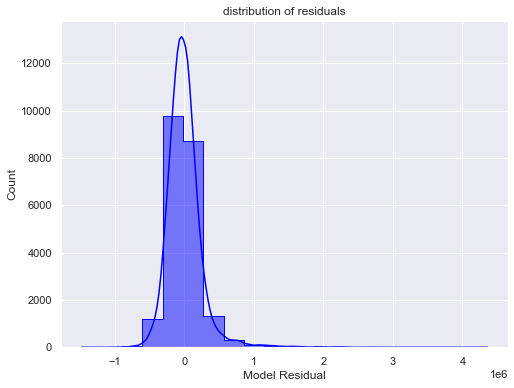

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(model1a.resid, bins=20, element="step", kde=True, color='blue', ax=ax)
ax.set_xlabel("Model Residual")
ax.set_title('distribution of residuals')

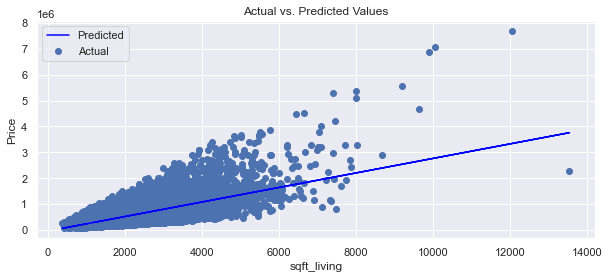

In [151]:
# Visualize the linearity
plt.scatter(X['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(df['sqft_living'], model1a.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

##### Interpretation of regression results.
* R-squared: The R-squared value is 0.493, indicating that approximately 49.3% of the variance in price can be explained by the sqft_living.
* The model is statistically significant overall, with an F-statistic p-value well below 0.05.
* The intercept is USD -4.399e+04 meaning that when all other variables are zero the estimated price is USD -4.399e+04
* The coefficient is 280 meaning that for every unit increase in sqaure footage of sqft_living,the price increases by USD 280.8
* The model violates the normality assumptions of linear regression and homoscedasticity.
* To address these issues, we need to perform log transformations on the dependent variable sqft_living and price.

THE RMSE:  0.029058821272708868
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.475
Method:                 Least Squares   F-statistic:                 1.953e+04
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:39:05   Log-Likelihood:                 45776.
No. Observations:               21597   AIC:                        -9.155e+04
Df Residuals:                   21595   BIC:                        -9.153e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.

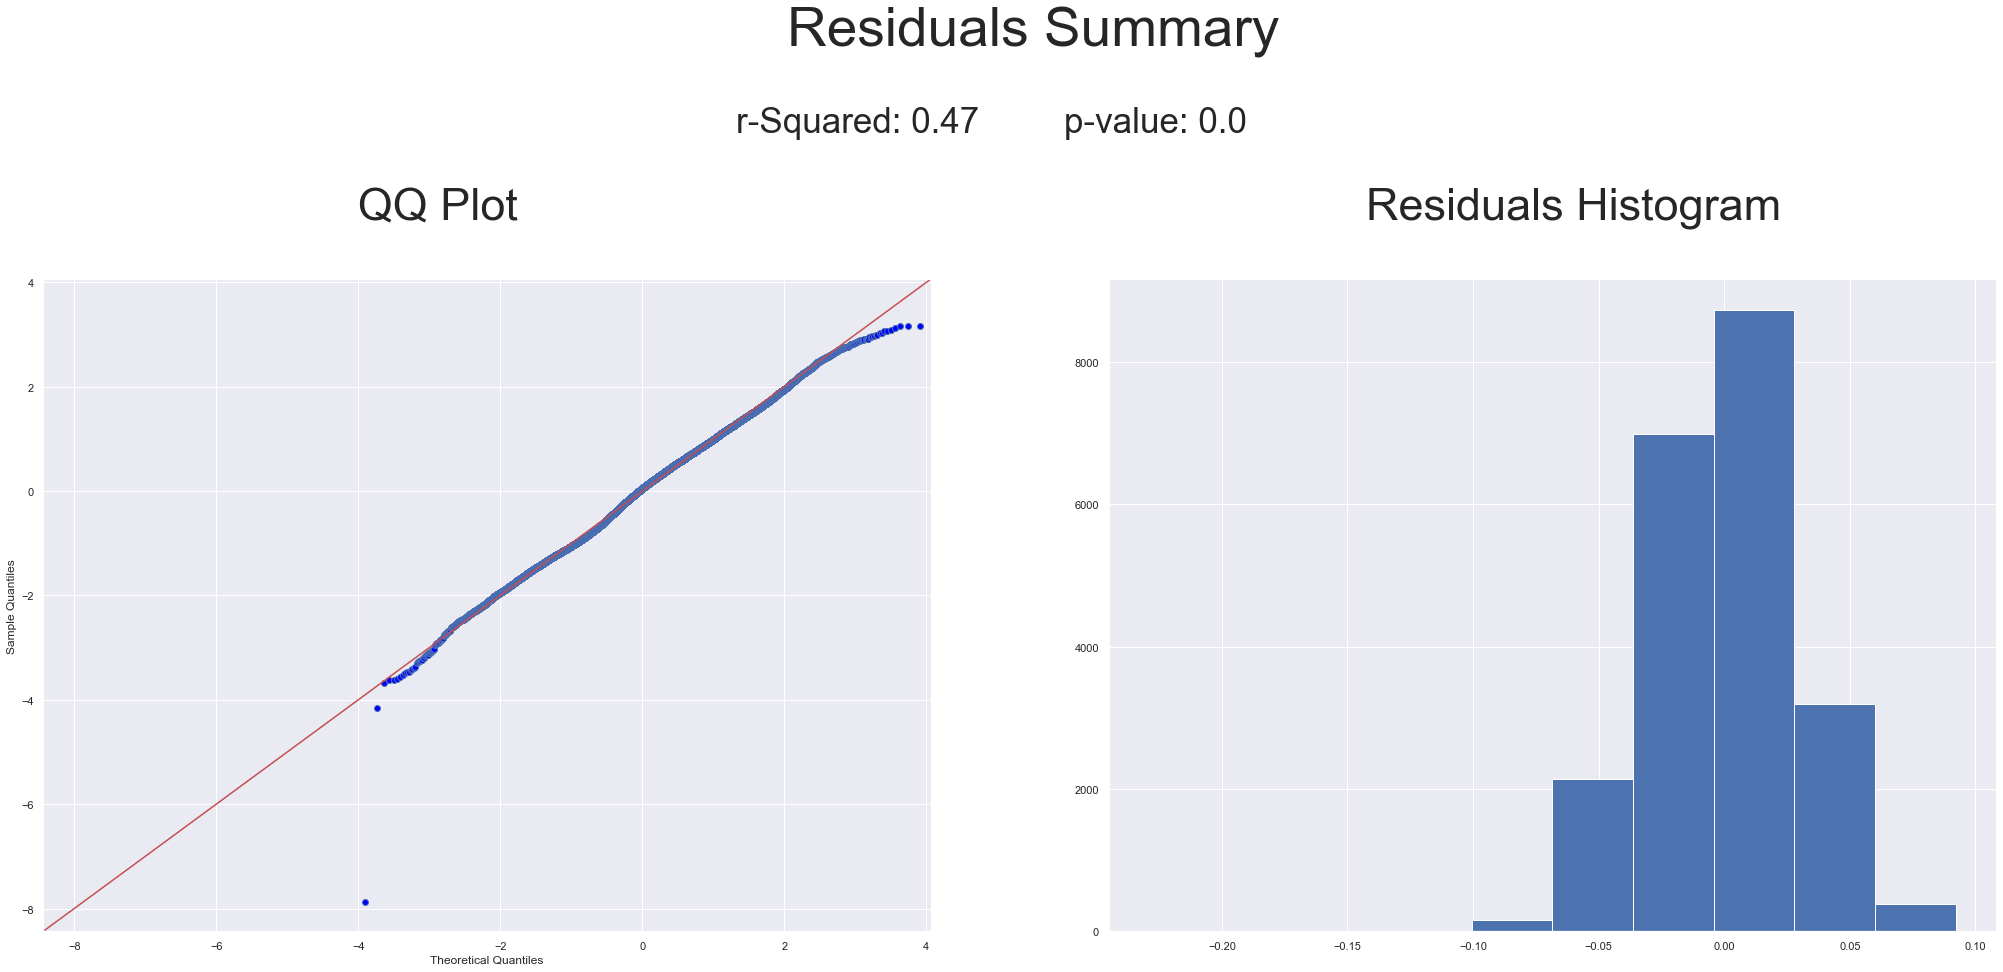

In [155]:
# Log transformation (For price and sqft_living)
df['price'] = np.log(df['price'])

f = 'price~sqft_living'
model1b = smf.ols(formula=f, data=df).fit()


# RMSE
rmse = np.sqrt(model1b.mse_resid)


print("THE RMSE: ", rmse)

model_Plots(model1b, df['sqft_living'], 'sqft_living', price)
print(model1b.summary())

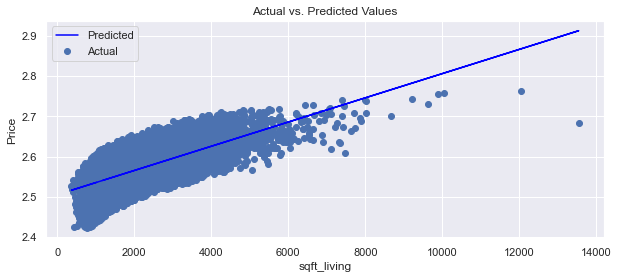

In [156]:
# Visualize the linearity
plt.scatter(X['sqft_living'], y, label='Actual')  # Scatter plot of actual values
plt.plot(df['sqft_living'], model1b.predict(), color='blue', label='Predicted')  # Line plot of predicted values
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

Text(0.5, 1.0, 'distribution of residuals after transformation ')

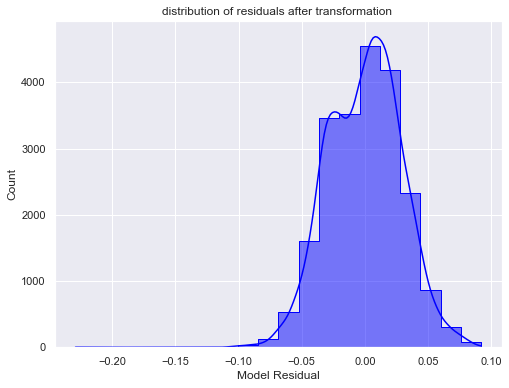

In [157]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a subplot
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(model1b.resid, bins=20, element="step", kde=True, color='blue', ax=ax)
ax.set_xlabel("Model Residual")
ax.set_title('distribution of residuals after transformation ')

### Multiple Regression

#### Model 2
Our first multilinear regression model includes all the selected variables.

In [158]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error

y = 'price'
X = list(df.columns)
X.remove('price')

indepent_var = '+'.join(X)
formula = y + '~' + indepent_var
model2 = ols(formula=formula, data=df).fit()

# RMSE
rmse = np.sqrt(model2.mse_resid)


print("THE RMSE: ", rmse)

THE RMSE:  0.019372807530678444


In [159]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     4174.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:45:34   Log-Likelihood:                 54540.
No. Observations:               21597   AIC:                        -1.090e+05
Df Residuals:                   21579   BIC:                        -1.089e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -6.5955      0.635    -10.381      0.000      -7.841      -5.350
bedrooms         -0.0008      0.000     -4.574      0.000      -0.001      -0.000
bathrooms         0.0057      0.000     18.382      0.000       0.005       0.006
sqft_living    1.129e-05   4.23e-07     26.716      0.000    1.05e-05    1.21e-05
sqft_lot       3.685e-08   4.61e-09      7.991      0.000    2.78e-08    4.59e-08
floors            0.0063      0.000     18.289      0.000       0.006       0.007
waterfront        0.0256      0.002     14.456      0.000       0.022       0.029
view              0.0052      0.000     22.643      0.000       0.005       0.006
condition         0.0047      0.000     21.194      0.000       0.004       0.005
grade             0.0123      0.000     59.252      0.000       0.012       0.013
sqft_above    -1.636e-06   4.19e-07     -3.907      0.000   -2.46e-06   -8.15e-07
zipcode       -4.797e-05   3.17e-06    -15.125      0.000   -5.42e-05   -4.18e-05
lat               0.1082      0.001    104.923      0.000       0.106       0.110
long             -0.0105      0.001     -8.313      0.000      -0.013      -0.008
sqft_living15  7.527e-06   3.32e-07     22.701      0.000    6.88e-06    8.18e-06
sqft_lot15    -1.667e-08   7.06e-09     -2.361      0.018   -3.05e-08   -2.83e-09
year              0.0036      0.000     12.744      0.000       0.003       0.004
Age_sold          0.0003   6.62e-06     41.624      0.000       0.000       0.000
==============================================================================
Omnibus:                      520.113   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1040.798
Skew:                          -0.153   Prob(JB):                    9.86e-227
Kurtosis:                       4.031   Cond. No.                     4.85e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

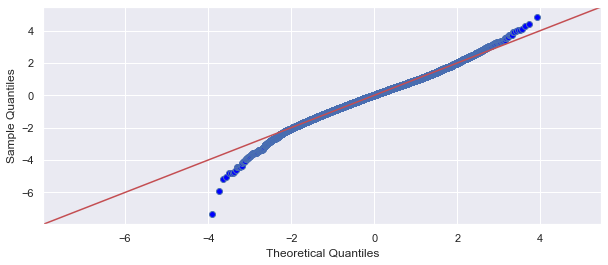

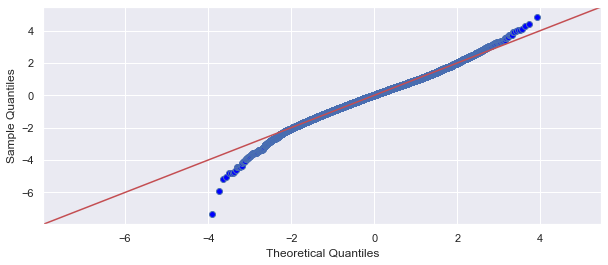

In [160]:
sm.graphics.qqplot(model2.resid, dist=stats.norm, line='45', fit=True)

##### Interpretation of regression results of Model 2.

* R-squared: The R-squared value is 0.772, indicating that approximately 77.2% of the variance in price can be explained by the 16 independent variables.

* The model is statistically significant overall, with an F-statistic p-value well below 0.05 the intercept is -110.9581 meaning that when all other variables are zero the estimated price is -110.9581.

* Statistical Significance: all the predictors are statistically significant with zero p-values . condition number:Cond. No.4.85e+08,this suggest there is high multicollinearity

* 'italicized text' The model has a high R-Squared of 0.773 showing that 77.3% of variance in price is explained. However, there is non-normality in residuals and the condition number is high showing that there is high collinearity between the variables. Next, we do feature selection to enhance the model.

In [161]:
correlation_matrix = df.assign(price=df['price']).corr()
correlation_with_price = correlation_matrix['price'].drop('price')
correlation_with_price

bedrooms         0.343000
bathrooms        0.549107
sqft_living      0.689148
sqft_lot         0.099618
floors           0.311905
waterfront       0.164229
view             0.326130
condition        0.038737
grade            0.699934
sqft_above       0.596250
zipcode         -0.037439
lat              0.455413
long             0.052427
sqft_living15    0.615707
sqft_lot15       0.091953
year             0.004995
Age_sold        -0.082523
Name: price, dtype: float64

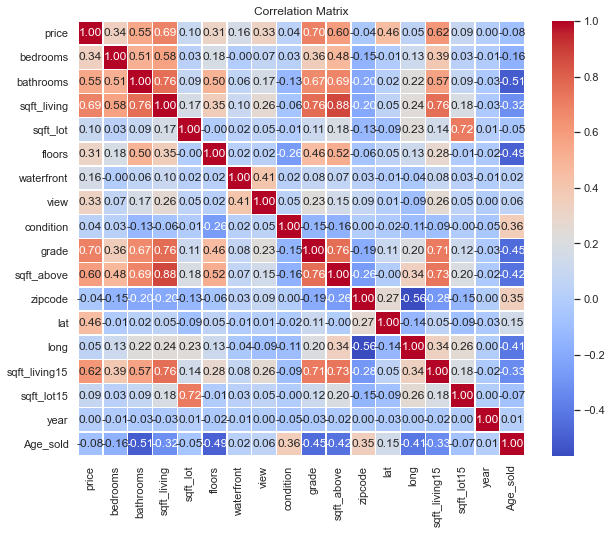

In [162]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

#### Model 3
##### Dealing with multicollinearity
We remove the variables that have low correlation with price and those that have high multicollinearity.

In [163]:
# Determine X and y values

X = df.drop(['price','view','condition', 'Age_sold','year','zipcode','waterfront','lat','long','sqft_above','sqft_lot','sqft_lot15'], axis=1)
X=sm.add_constant(X)
y=df["price"]
M_model3=sm.OLS(y,X).fit()

# RMSE
rmse = np.sqrt(M_model3.mse_resid)

print("THE RMSE: ", rmse)

M_model3.summary()

THE RMSE:  0.026850994420122582


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.552
Method:                 Least Squares   F-statistic:                     4430.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        18:52:25   Log-Likelihood:                 47485.
No. Observations:               21597   AIC:                        -9.496e+04
Df Residuals:                   21590   BIC:                        -9.490e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.4302      0.002   1497.553      0.000       2.427       2.433
bedrooms         -0.0012      0.000     -4.849      0.000      -0.002      -0.001
bathrooms        -0.0003      0.000     -0.692      0.489      -0.001       0.001
sqft_living    1.514e-05   4.31e-07     35.146      0.000    1.43e-05     1.6e-05
floors           -0.0004      0.000     -1.072      0.284      -0.001       0.000
grade             0.0131      0.000     47.806      0.000       0.013       0.014
sqft_living15  5.572e-06   4.33e-07     12.861      0.000    4.72e-06    6.42e-06
==============================================================================
Omnibus:                       34.617   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.830
Skew:                          -0.000   Prob(JB):                     5.49e-07
Kurtosis:                       2.821   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

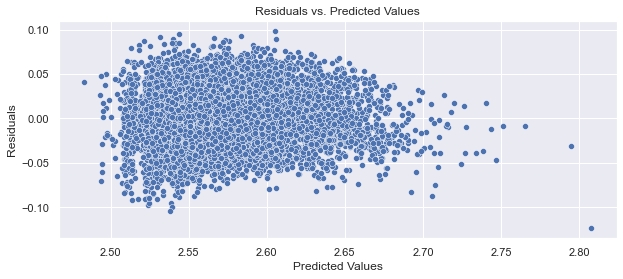

In [164]:
predicted_values = M_model3.fittedvalues

# Create a scatter plot of residuals against predicted values
sns.scatterplot(x=predicted_values, y=M_model3.resid)

# Set labels and title
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")

# Show the plot
plt.show()

There are linearity and Homoscedasticity residuals that are spread consistently across the predicted values.

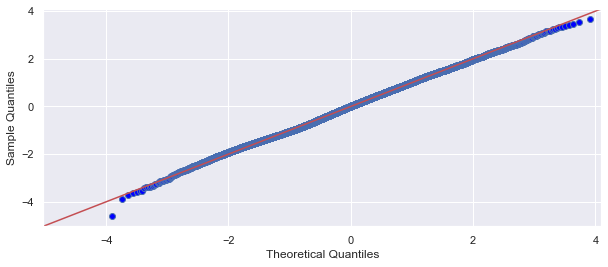

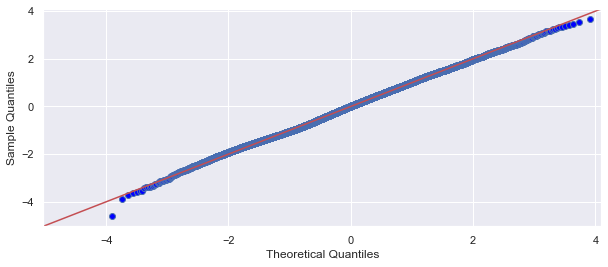

In [165]:
sm.graphics.qqplot(M_model3.resid, dist=stats.norm, line='45', fit=True)

There is an improvment of normality from the second model.

##### Interpretation of Regression Results
The model is statistically significant overall, with an F-statistic p-value well below 0.05

R-squared: The R-squared value is 0.560, indicating that approximately 56.0% of the variance in price can be explained by 'Bedrooms','Sqft_living','bathrooms','floors','grade','sqft_living15'

The intercept is 11.2452 meaning that when all other variables are zero the estimated log transformed price is 11.2452.

Bedrooms: For each unit incresea in bedroom, the log-transformed price is expected to decrease by 0.0185 units, holding other variables constant. More bedrooms are associated with a lower log-transformed price, all else being equal.

Bathrooms: The coefficient is not statistically significant.

sqft_living:For each unit incresea in square footage of living space, the log-transformed price is expected to increase by 0.0002 units.This means Larger living spaces are associated with higher log-transformed prices.

Floors:The coefficient is not statistically significant. Grade: For each additional grade point, the log-transformed price is expected to increase by 0.1722 units.

Sqft_living15:Interpretation: For each additional unit increase in square footage of living space in 2015, the log-transformed price is expected to increase by 0.00007114 units.

The R-squard of model 2 has dropped compared to the previous model from 77% to 54.6% .However the cond.no has reduced and the model has better linearity and normality after dealing with the multicollinearity

#### Model 4
Here we use categorical variables and sqft_living to predict price. So far we have been using categorical features as ordinal. We'll use One-hot encoding technique used to convert categorical variables into a binary to see if we get better results.

In [166]:
df_new=df[['sqft_living','waterfront','view', 'grade']]
y=df['price']
categorical_columns = ['waterfront','view', 'grade']

X=pd.get_dummies(df_new, columns=categorical_columns, drop_first=True)

X=sm.add_constant(X)
M_model4=sm.OLS(y,X).fit()
M_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     1800.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:02:21   Log-Likelihood:                 47974.
No. Observations:               21597   AIC:                        -9.591e+04
Df Residuals:                   21580   BIC:                        -9.578e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.5159      0.026     95.822      0.000       2.464       2.567
sqft_living   1.524e-05    3.1e-07     49.136      0.000    1.46e-05    1.59e-05
waterfront_1     0.0246      0.003      9.238      0.000       0.019       0.030
view_1           0.0136      0.001     15.420      0.000       0.012       0.015
view_2           0.0166      0.001     13.847      0.000       0.014       0.019
view_3           0.0193      0.001     13.173      0.000       0.016       0.022
view_4           0.0270      0.002     14.721      0.000       0.023       0.031
grade_4         -0.0308      0.027     -1.150      0.250      -0.083       0.022
grade_5         -0.0215      0.026     -0.816      0.415      -0.073       0.030
grade_6         -0.0061      0.026     -0.233      0.816      -0.058       0.045
grade_7          0.0094      0.026      0.358      0.720      -0.042       0.061
grade_8          0.0239      0.026      0.909      0.364      -0.028       0.075
grade_9          0.0386      0.026      1.468      0.142      -0.013       0.090
grade_10         0.0499      0.026      1.899      0.058      -0.002       0.101
grade_11         0.0569      0.026      2.164      0.030       0.005       0.109
grade_12         0.0619      0.026      2.341      0.019       0.010       0.114
grade_13         0.0676      0.027      2.474      0.013       0.014       0.121
==============================================================================
Omnibus:                       15.186   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.146
Skew:                          -0.033   Prob(JB):                     0.000847
Kurtosis:                       2.893   Cond. No.                     1.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

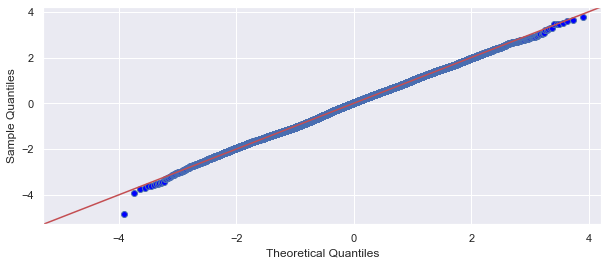

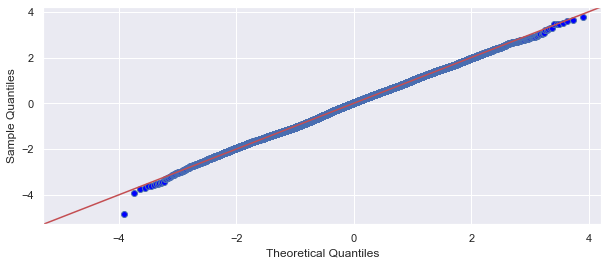

In [167]:
sm.graphics.qqplot(M_model4.resid, dist=stats.norm, line='45', fit=True)

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the model
# Get the features used in training
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(X,y, random_state = 12)

#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x3_train,y3_train)

y3_pred = OLS.predict(x3_test)

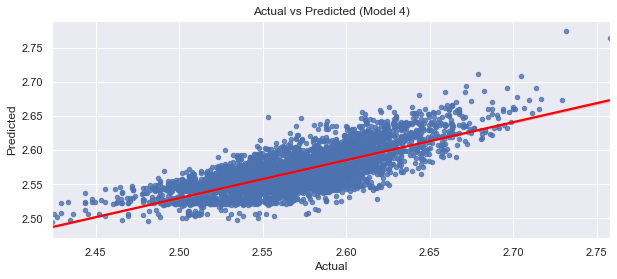

In [169]:

# Create a regression plot
sns.regplot(x=y3_test, y=y3_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Model 4)')

# Show the plot
plt.show()

##### Interpretation of Regression Results
The model is statistically significant overall, with an F-statistic p-value well below 0.05

R-squared: The R-squared value is 0.580, indicating that approximately 58% of the variance in price can be explained by 'sqft_living','waterfront','view_1','view_2,'view_3','view_4','grade_4','grade_5','grade_6','grade_7','grade_8','grade_9'grade_10','grade_11','grade_12',grade_13'

The intercept is 11.2452 meaning that when all other variables are zero the estimated log transformed price is 11.2452 corresponding to significant increase in price

sqft_living: For each unit increase in square footage of living space, the log-transformed price is expected to increase by 0.0002 units. Larger living spaces are associated with higher log-transformed prices.

waterfront_1: Having a waterfront view is associated with an increase of 0.3442 units in the log-transformed price, holding other variables constant.

view_1, view_2, view_3, view_4: Having better views (higher view categories) is associated with increases in log-transformed price: 0.1791, 0.2237, 0.2555, and 0.3670 units, respectively.

grade_4, grade_5, grade_6, grade_7, grade_8, grade_9, grade_10 are not statistically significant

grade_11: An increase in grade from 11 is associated with an increase of 0.7652 units in the log-transformed price, holding other variables constant. grade_12: An increase in grade from 12 is associated with an increase of 0.8580 units in the log-transformed price, holding other variables constant. grade_13: An increase in grade from 13 is associated with an increase of 0.9900 units in the log-transformed price, holding other variables constant.

We can see that our R-squared has increased to 0.580 this is a good indication of a good fit. The rmse is also lower than the previous model next well try to look at few features together with categorical variables to see if we can enhance our model.

#### Model 5
We are using more features

In [170]:

# model(more features and categorical variables)
# Determine X and y values
X = df.drop(['price', 'zipcode', 'long', 'Age_sold','year','lat','sqft_lot15',
             'sqft_lot','sqft_above','sqft_living15','waterfront',
             'floors'], axis=1)
X=sm.add_constant(X)
y=df["price"]
M_model5=sm.OLS(y,X).fit()

# RMSE
rmse = np.sqrt(M_model5.mse_resid)

print("THE RMSE: ", rmse)

M_model5.summary()

THE RMSE:  0.025982158165756216


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.580
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     4976.
Date:                Thu, 04 Jan 2024   Prob (F-statistic):               0.00
Time:                        19:09:06   Log-Likelihood:                 48195.
No. Observations:               21597   AIC:                        -9.638e+04
Df Residuals:                   21590   BIC:                        -9.632e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           2.4007      0.002   1239.579      0.000       2.397       2.404
bedrooms       -0.0011      0.000     -4.411      0.000      -0.002      -0.001
bathrooms       0.0006      0.000      1.746      0.081   -7.88e-05       0.001
sqft_living  1.479e-05   3.83e-07     38.663      0.000     1.4e-05    1.55e-05
view            0.0078      0.000     29.087      0.000       0.007       0.008
condition       0.0073      0.000     26.111      0.000       0.007       0.008
grade           0.0147      0.000     59.819      0.000       0.014       0.015
==============================================================================
Omnibus:                       14.289   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.288
Skew:                          -0.059   Prob(JB):                     0.000789
Kurtosis:                       2.956   Cond. No.                     2.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

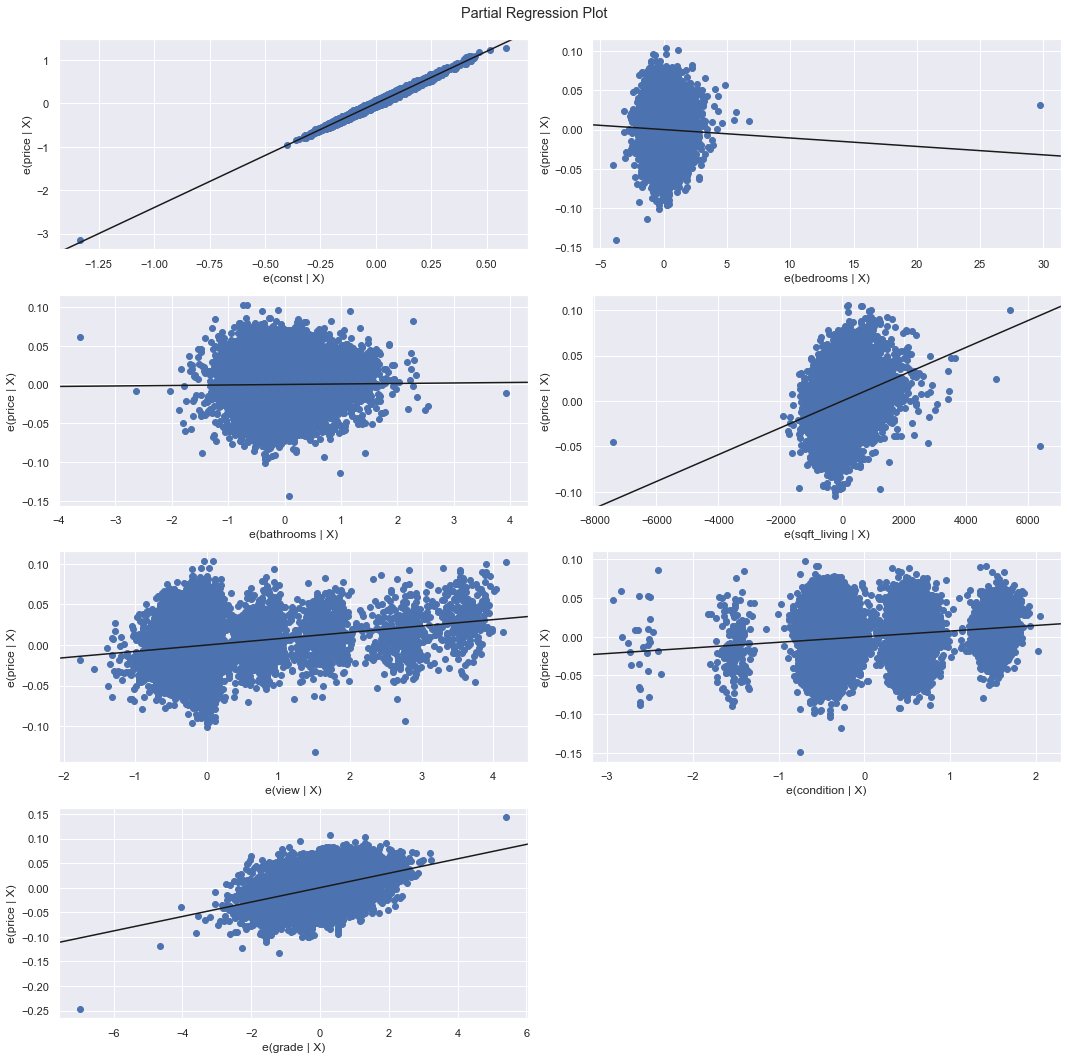

In [171]:
fig = plt.figure(figsize=(15, 15))
sm.graphics.plot_partregress_grid(M_model5, fig=fig)
plt.show()

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions using the model
# Get the features used in training
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(X,y, random_state = 12)

#training the model
from sklearn.linear_model import LinearRegression
OLS = LinearRegression()
OLS.fit(x4_train,y4_train)

y4_pred = OLS.predict(x4_test)


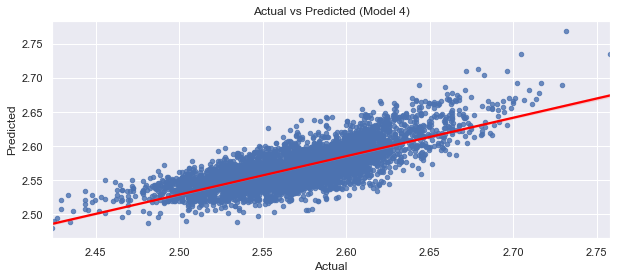

In [173]:
# Create a regression plot
sns.regplot(x=y4_test, y=y4_pred, scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Set plot labels and title
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted (Model 4)')

# Show the plot
plt.show()


#### Interpretation of the model
The model is statistically significant overall, with an F-statistic p-value well below 0.05

R-squared: The R-squared value is 0.590, indicating that approximately 59% of the variance in price can be explained by bedrooms,bathrooms,sqft_livn,view,condition,grade

The intercept is USD 10.8598, indicating that when all other variables are zero, the estimated log-transformed price is USD 10.8598.

bedrooms:

For each unit increase in the number of bedrooms, the log-transformed price is expected to decrease by USD 0.0163 units, holding other variables constant. More bedrooms are associated with a lower log-transformed price, all else being equal.

bathrooms:The coefficient is not statistically significant (p-value = 0.243).

sqft_living:For each unit increase in square footage of living space, the log-transformed price is expected to increase by USD 0.0002 units. Larger living spaces are associated with higher log-transformed prices. view:

For each unit increase in the view category, the log-transformed price is expected to increase by USD 0.1066 units. condition:

For each unit increase in the condition rating, the log-transformed price is expected to increase by USD 0.0954 units. grade:

For each unit increase in the grade rating, the log-transformed price is expected to increase by USD 0.1916 units.

## 6. Results
Model 1a. with 1 predictor (sqft_living) R-squared:0.493

Model 1b. with 1 predictor (transformed price):R-squared:0.483

Model 2. with all predictors (all_features):R-squared:0.499

Model 3 with 6 predictors (handled multicollinearity and low correlation):R-squared: 0.560 * Adj. R-squared: 0.559*

Model 4 with 16 predictors (baseline and categorical variables):R-squared: 0.580 * Adj. R-squared: 0.580*

Model 5 with 6 predictors (more features and categorical data and features low p-values):R-squared: 0.590 and * Adj. R-squared: 0.589*

Model 1a (1 predictor - sqft_living): R-squared of 0.493 indicates that around 49.3% of the variance in the dependent variable is explained by sqft_living alone.

Model 1b (1 predictor - transformed price): R-squared of 0.483 indicates that around 48.3% of the variance in the log-transformed price is explained by the predictor.

Model 2 (all features): R-squared of 0.499 suggests that including all available predictors improves the explanation of variance compared to Model 1, but it's still relatively modest.

Model 3 (6 predictors - handled multicollinearity and low correlation): R-squared of 0.560 and Adj. R-squared of 0.559 indicate an improvement in explaining variance, and addressing multicollinearity and low correlation has positively impacted the model.

Model 4 (16 predictors - baseline and categorical variables): R-squared of 0.580 and Adj. R-squared of 0.580 indicate further improvement, especially with the inclusion of categorical variables.

Model 5 (6 predictors - more features, categorical data, and low p-values): R-squared of 0.590 and Adj. R-squared of 0.589 suggest the highest explanatory power among the mentioned models. The inclusion of more features, categorical data, and low p-values has contributed to the improved performance.

BEST MODEL Model 5, which includes more features, categorical data, and low p-values, is chosen as the best model due to its higher R-squared value (0.590) and adjusted R-squared value (0.589). This model strikes a balance between explanatory power and complexity.The RMSE of approximately 0.3374 suggests that, on average, the model's predictions deviate from the actual values by around 0.3374 log-transformed units. This gives an indication of the typical error in the model's predictions.

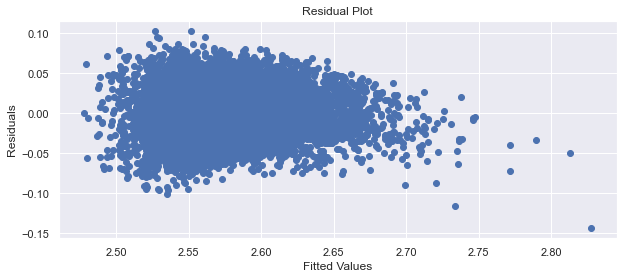

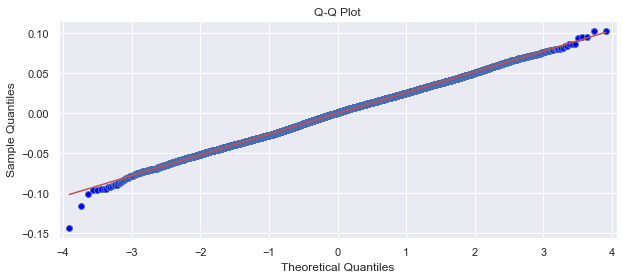

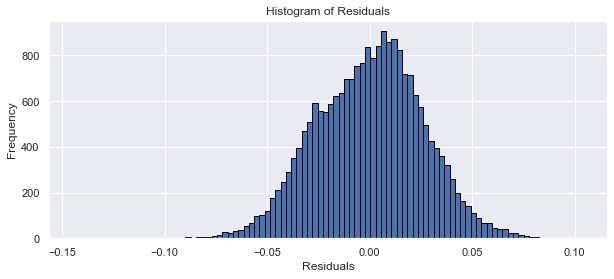

Homoscedasticity Test p-value: 3.705542990439246e-78
Durbin-Watson Statistic: 1.9749313525997165


In [174]:
# EVALUATING OUR MODEL
## assumptions of linear regression
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats

residuals = M_model5.resid

# Residual Plot
# Residual Plot
plt.scatter(M_model5.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Q-Q Plot for Normality
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot')
plt.show()

# Histogram for Normality
plt.hist(residuals, bins='auto', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Homoscedasticity Test
_, p_value, _, _ = het_breuschpagan(residuals, M_model5.model.exog)
print(f'Homoscedasticity Test p-value: {p_value}')

# Durbin-Watson Test for Independence
durbin_watson_stat = sm.stats.stattools.durbin_watson(residuals)
print(f'Durbin-Watson Statistic: {durbin_watson_stat}')

All the variables pass the assumption of linearity,normality and homoscedasticity

The features that affect price are bedrooms, sqft_living, view, condition, and grade

Grade is a major predictor of price with the highest coefficient.

## 7. Recommendations

Based on findings from our model:

* Consider the importance of bedrooms, sqft_living, view, condition, and grade when estimating or predicting housing prices.

* Focus on upgrading property features to improve the overall grade. Communicate the potential financial returns associated with higher-grade properties.

* Investigate the inconsistency in the impact of bathrooms on pricing. Collect additional data or refine the variable to better capture its significance.

* Consider promoting properties with fewer bedrooms for buyers who prioritize cost-effectiveness. Highlight the advantages of smaller bedroom counts in terms of affordability.

* Capitalize on properties with better views, incorporating visuals and descriptions that showcase the scenic surroundings to attract potential buyers.

* Continuous efforts to improve the model can be made by exploring additional relevant features and refining existing ones.


## 8. Conclusions

Model Validity:
The model provides a substantial explanation of housing price variance. However, the impact of bathrooms needs further investigation to enhance the model's validity.

Property Features Influence Pricing:
Bedrooms, sqft_living, view, condition, and grade significantly influence housing prices. These features are essential considerations for buyers and sellers.

There are limitations to the model and we used log transformation to meet assupmtions of linearity.

## 9. NEXT STEPS
Gathering additional data on the homes as there may be key features missing.

Methods other than regression could be used to meet assumptions.